#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

import joblib # modelni saqlash uchun

# Malumotlarni tahlili

In [ ]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB




*   Qatorlar soni 10000
*   Tushib qolgan qiymatlar yo'q


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
print(df[['CustomerId',"CreditScore"]].duplicated().sum())
print(df.index.duplicated().sum())

0
0


Takrorlanadigan qiymatlar yo'q ekan va
Biz uchun muhim ustun bu ` Exited` ustuni, aynan shu ustun `label` (ya'ni bashorat qilinuvchi klass) vazifasini bajaradi.

Keling bu ustundagi qiymatlar nisbatini ko'ramiz:

In [ ]:
df['Exited'].value_counts()/(len(df))*100

,count
Exited,
0,79.63
1,20.37




*  7963 ta mijoz qolgan
*  2037 ta mijoz ketgan



In [ ]:
churn_rate = df['Exited'].value_counts()/(len(df))*100

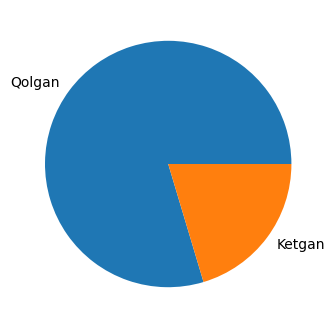

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(churn_rate, labels=["Qolgan","Ketgan"])
plt.show()

#### Bazi ustunlarni tahlilini ko'ramiz

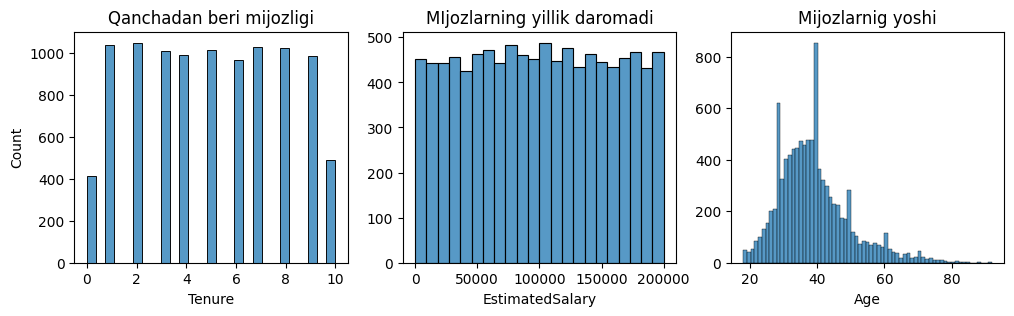

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,3))

sns.histplot(data=df, x="Tenure", ax=ax[0])
ax[0].set_title("Qanchadan beri mijozligi")

sns.histplot(data=df, x="EstimatedSalary", ax=ax[1])
ax[1].set_title("MIjozlarning yillik daromadi")
ax[1].set_ylabel("")

sns.histplot(data=df, x="Age", ax=ax[2])
ax[2].set_title("Mijozlarnig yoshi")
ax[2].set_ylabel("")

plt.show()

#### Kategoriyali ustunlarni tahlili

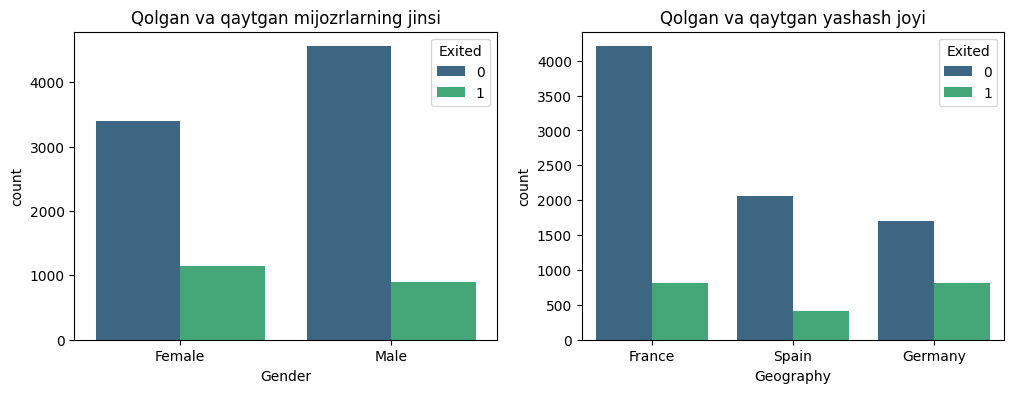

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='Geography', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan yashash joyi")
ax[1].set_ylabel("")

plt.show()

#### Korrelatsiya

In [ ]:
df.corrwith(df["Exited"], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
NumOfProducts,0.047820
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097
HasCrCard,0.007138
CustomerId,0.006248


# ML

## MLga tayyorgarlik

In [ ]:
df.columns.to_list()

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
# Standanart Scaling
scaler = StandardScaler()

num_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,-0.326221,France,Female,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
2,15647311,Hill,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
3,15619304,Onio,-1.536794,France,Female,0.293517,1.032908,1.333053,3,1,0,0.240687,1
4,15701354,Boni,0.501521,France,Female,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
5,15737888,Mitchell,2.063884,Spain,Female,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


## `Matnli` ustunlarni `tashlab yuborib` hisoblashlar

### Logistic Regression

#### Malumotlarga ishlov berish

In [ ]:
# Matnli ustunlar uchun
X = df.drop(["Exited", "Surname",'Gender','Geography',"CustomerId"], axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(8000, 8)

In [ ]:
X_test.shape

(2000, 8)

#### ML

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = LR_model.predict(X_test)

#### Modelni baholash

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.55      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.77      0.81      0.76      2000

Modelning aniqligi: 0.809


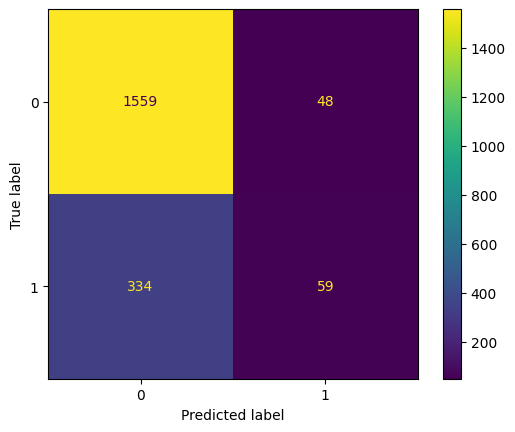

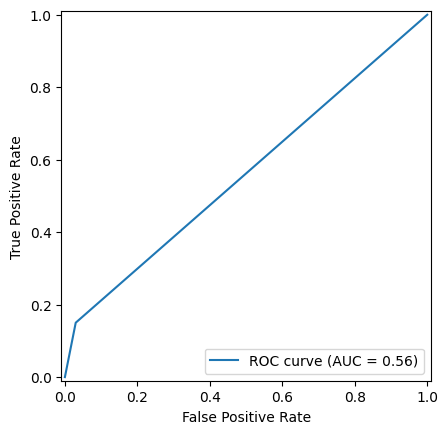

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test, y_predict))
print("Modelning aniqligi:", metrics.accuracy_score(y_test, y_predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decision Tree

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_predict = tree_model.predict(X_test)

#### Modelni baholaymiz

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

Modelning aniqligi: 0.8485


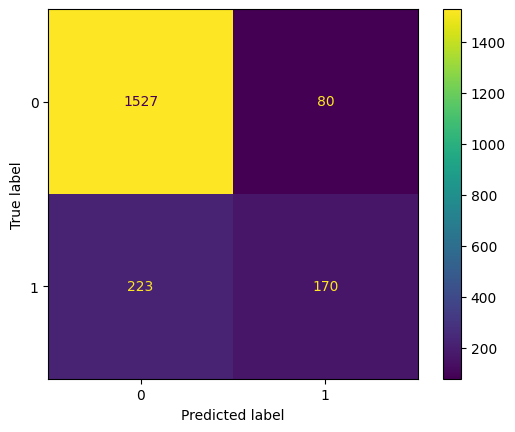

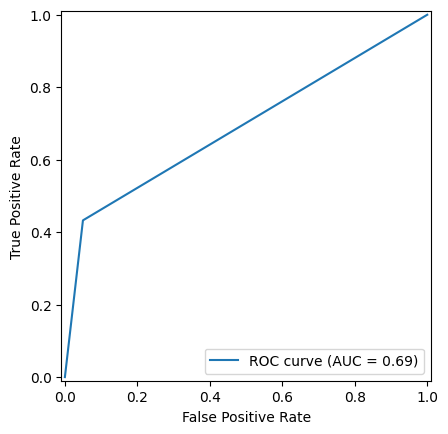

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test, y_predict))
print("Modelning aniqligi:", metrics.accuracy_score(y_test, y_predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

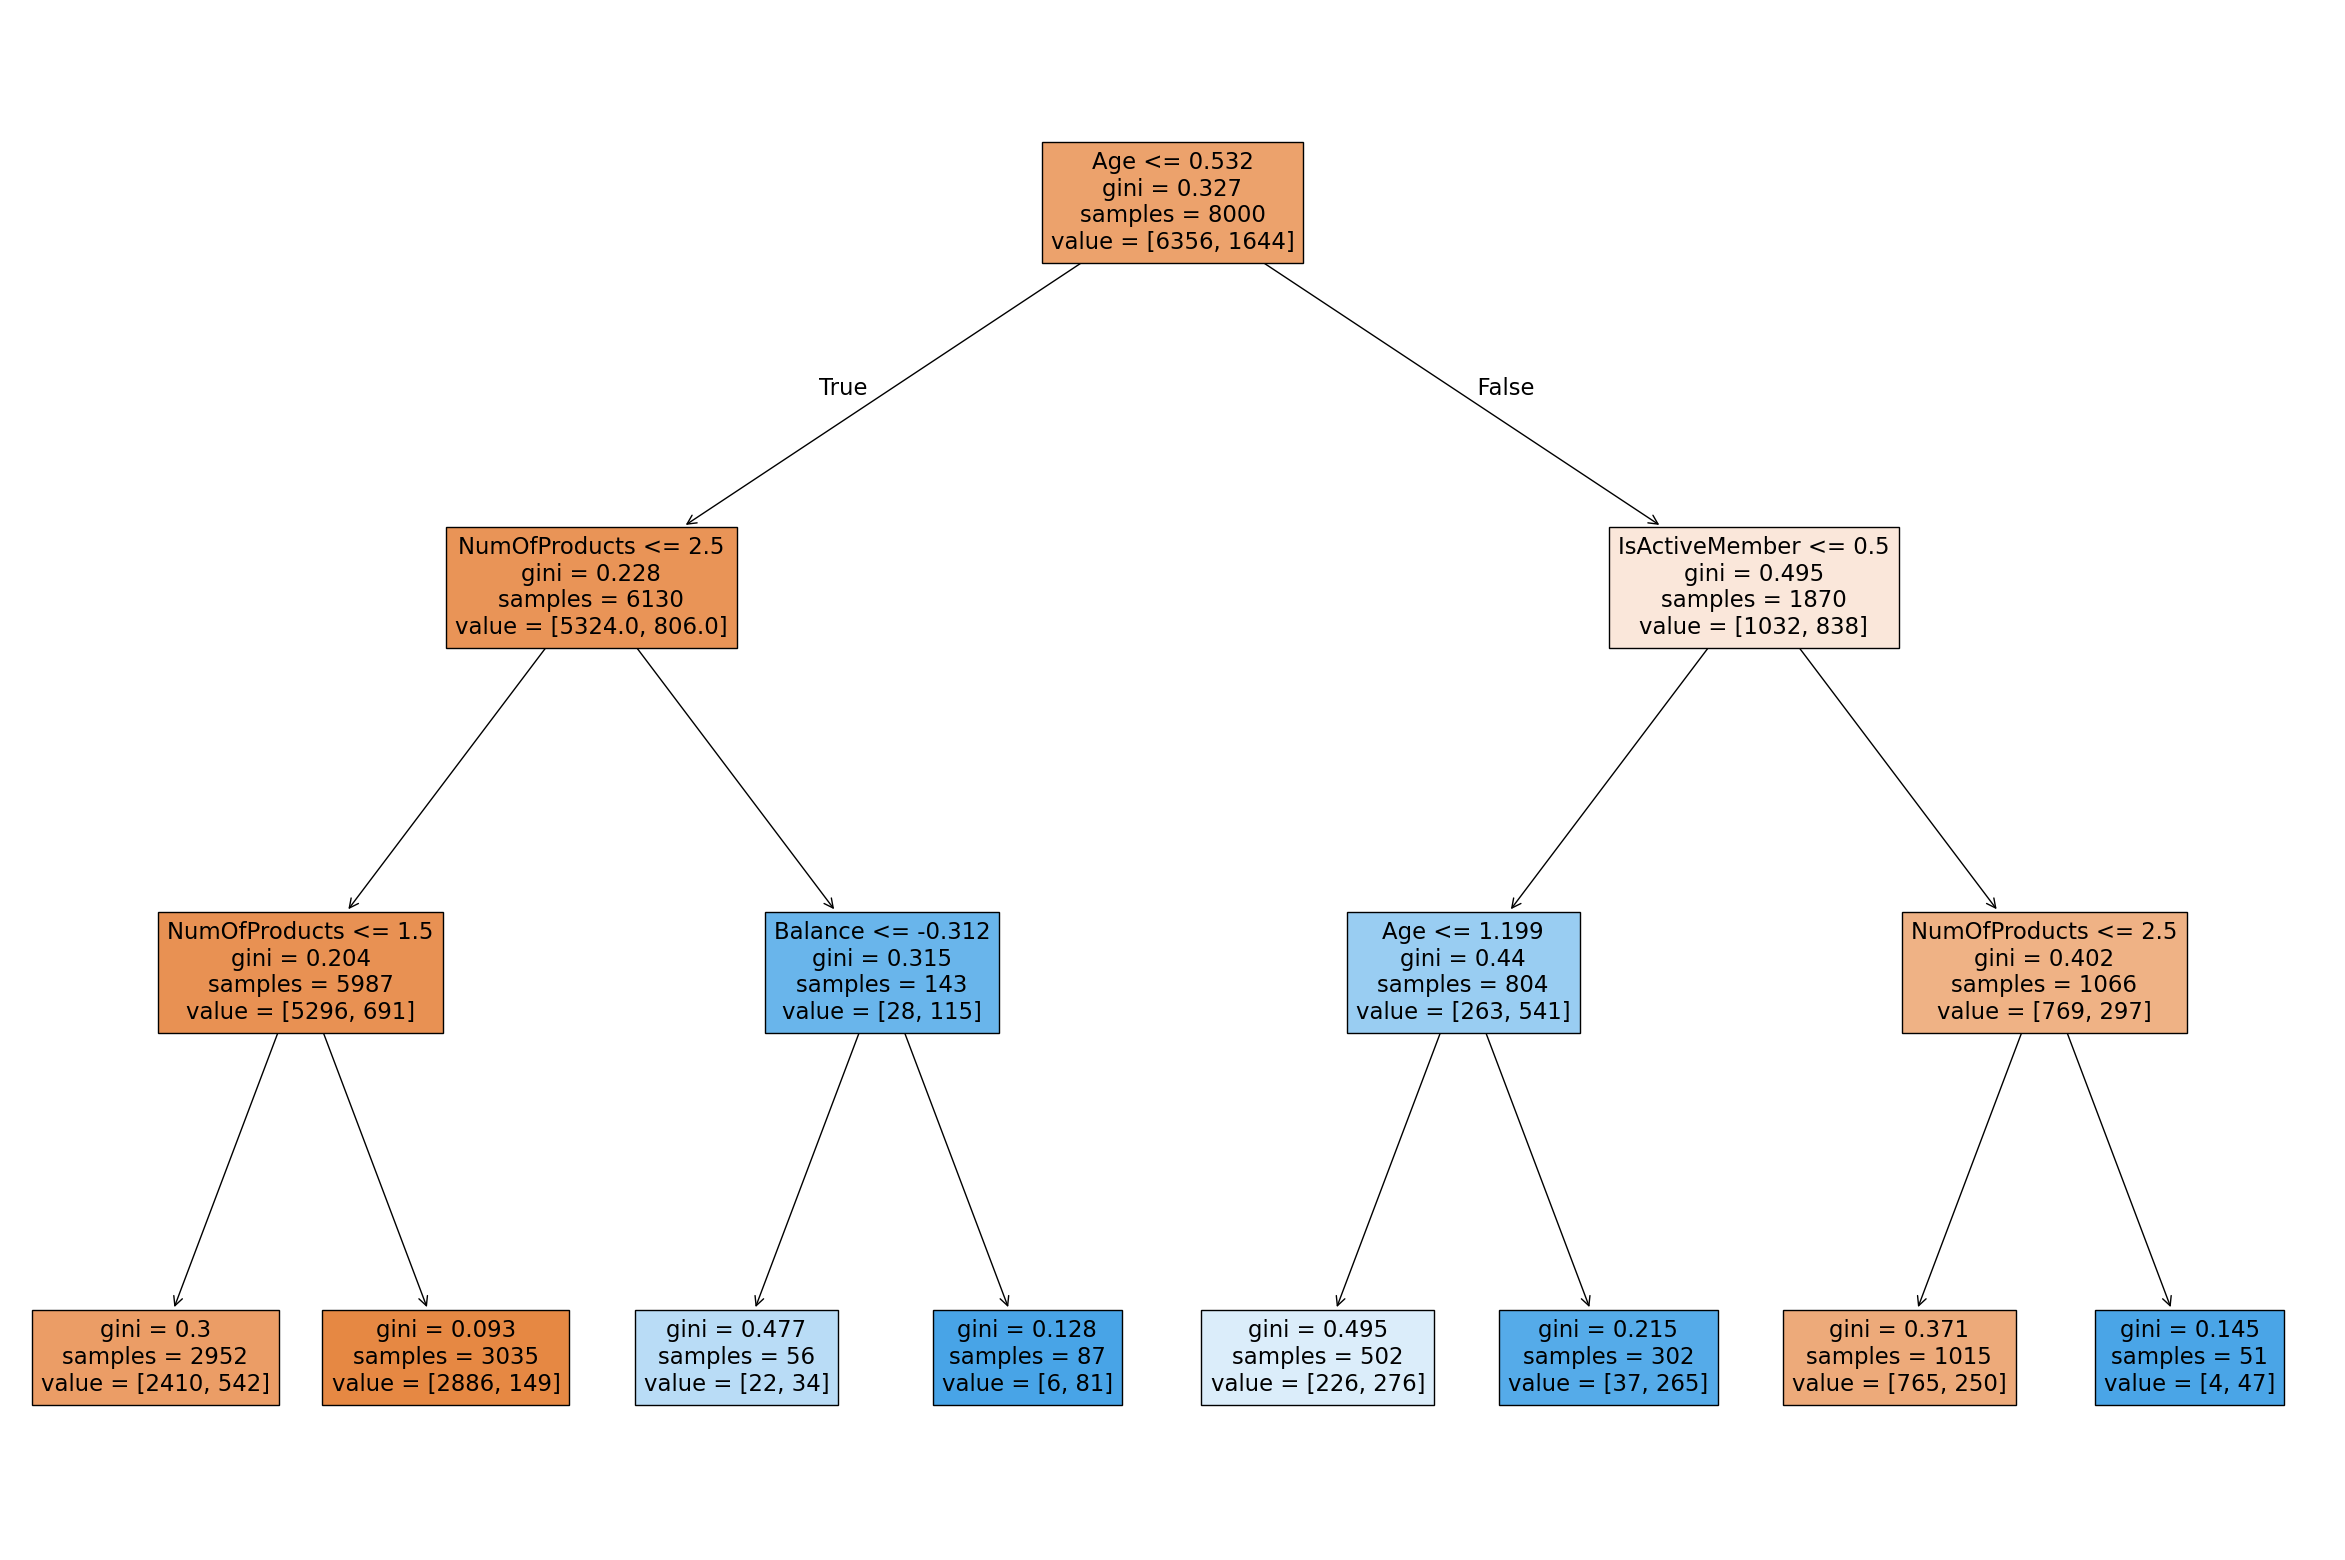

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

### Random Forest

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = RF_model.predict(X_test)

#### Modelni baholash

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Modelning aniqligi: 0.86


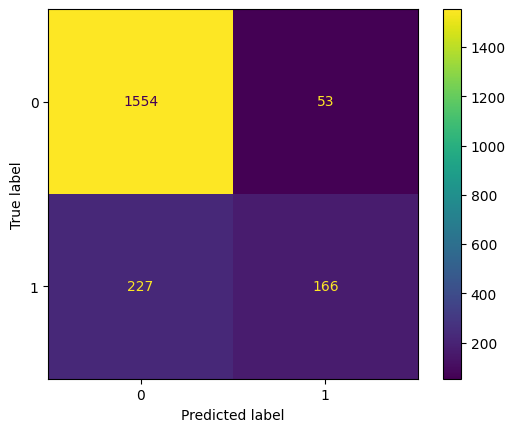

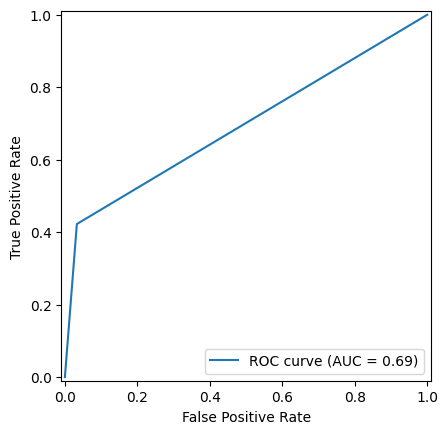

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test, y_predict))
print("Modelning aniqligi:", metrics.accuracy_score(y_test, y_predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### SVM

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [ ]:
y_predict = svm_clf.predict(X_test)

#### Modelni baholash

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.35      0.48       393

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000

Modelning aniqligi: 0.8545


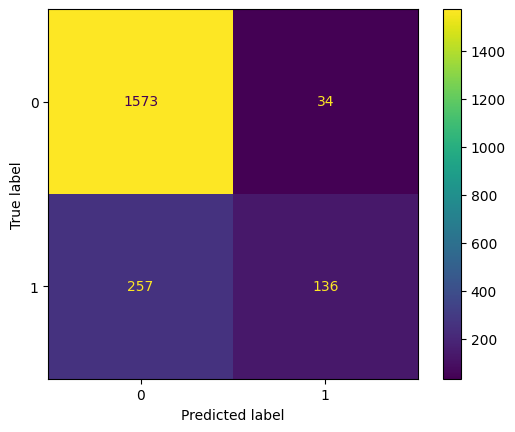

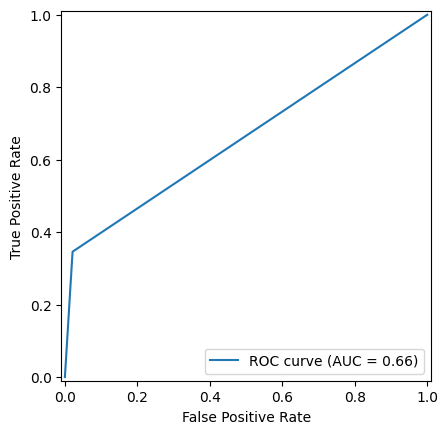

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test, y_predict))
print("Modelning aniqligi:", metrics.accuracy_score(y_test, y_predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost

In [ ]:
xgdboost = XGBClassifier()
xgdboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predict = xgdboost.predict(X_test)

#### Modelni baholashlar

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.65      0.45      0.53       393

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000

Modelning aniqligi: 0.843


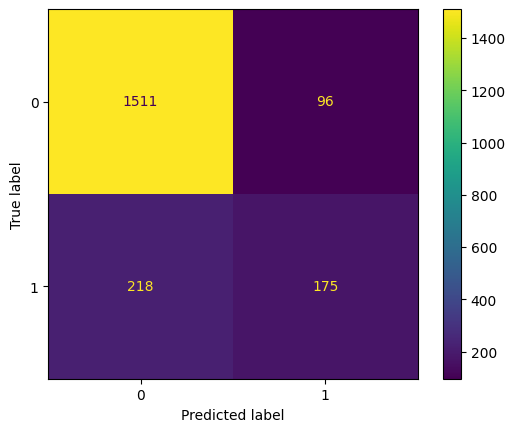

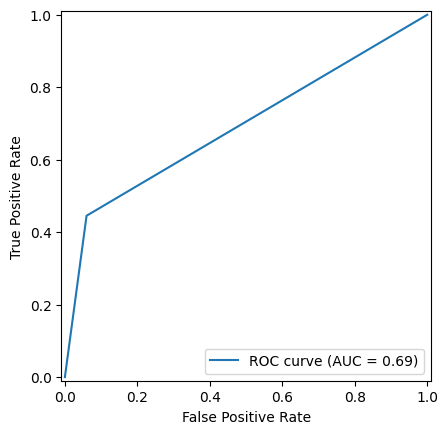

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test, y_predict))
print("Modelning aniqligi:", metrics.accuracy_score(y_test, y_predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## `Matnli` ustunlarni `songa o'tkazib` hisoblashlar

### Malumotlarni tayyorlash

In [ ]:
df1 = df.copy()

In [ ]:
# Sonli ustunlarni matnga o'tkazamiz
replaceable = {"Female":0, "Male":1}
replaceable2 = {"France":0, "Germany":1, "Spain":2}
df1['Gender'] = df1['Gender'].map(replaceable)
df1['Geography'] = df1['Geography'].map(replaceable2)
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,-0.326221,0,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
2,15647311,Hill,-0.440036,2,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
3,15619304,Onio,-1.536794,0,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
4,15701354,Boni,0.501521,0,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
5,15737888,Mitchell,2.063884,2,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


In [ ]:
# Sonli ustunlar uchun
X1 = df1.drop(["Exited","Surname","CustomerId"], axis=1)
y1 = df1["Exited"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)

### Logistic Regression

In [ ]:
LR_model1 = LogisticRegression()
LR_model1.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
y_predict1 = LR_model1.predict(X_test1)

#### Modelni **baholash**

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Modelning aniqligi: 0.8155


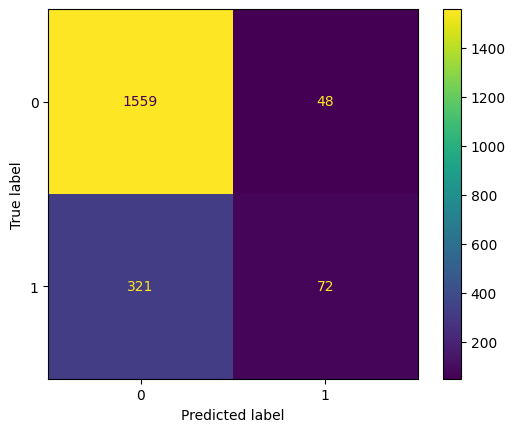

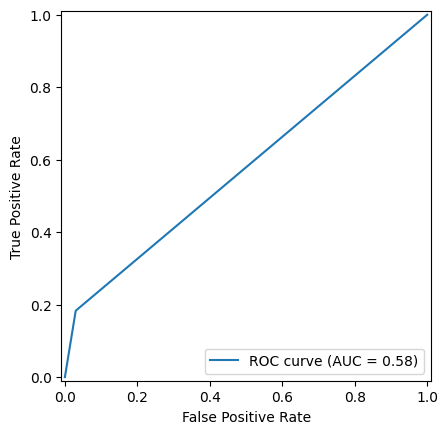

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test1, y_predict1))
print("Modelning aniqligi:", metrics.accuracy_score(y_test1, y_predict1))

metrics.ConfusionMatrixDisplay.from_predictions(y_test1, y_predict1)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_predict1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### Decion Tree

In [ ]:
tree_model1 = DecisionTreeClassifier(max_depth=3)  # Eng yaxshi natija 'max_depth=3' bilan bo'ldi
tree_model1.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_predict1 = tree_model1.predict(X_test1)

#### Modelni baholashlar

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

Modelning aniqligi: 0.8485


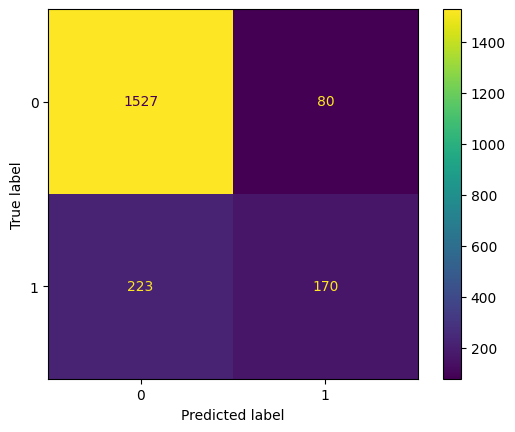

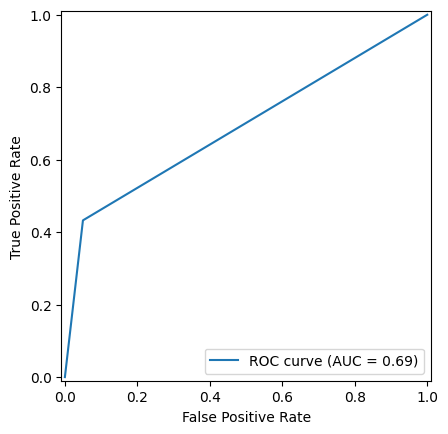

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test1, y_predict1))
print("Modelning aniqligi:", metrics.accuracy_score(y_test1, y_predict1))

metrics.ConfusionMatrixDisplay.from_predictions(y_test1, y_predict1)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_predict1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

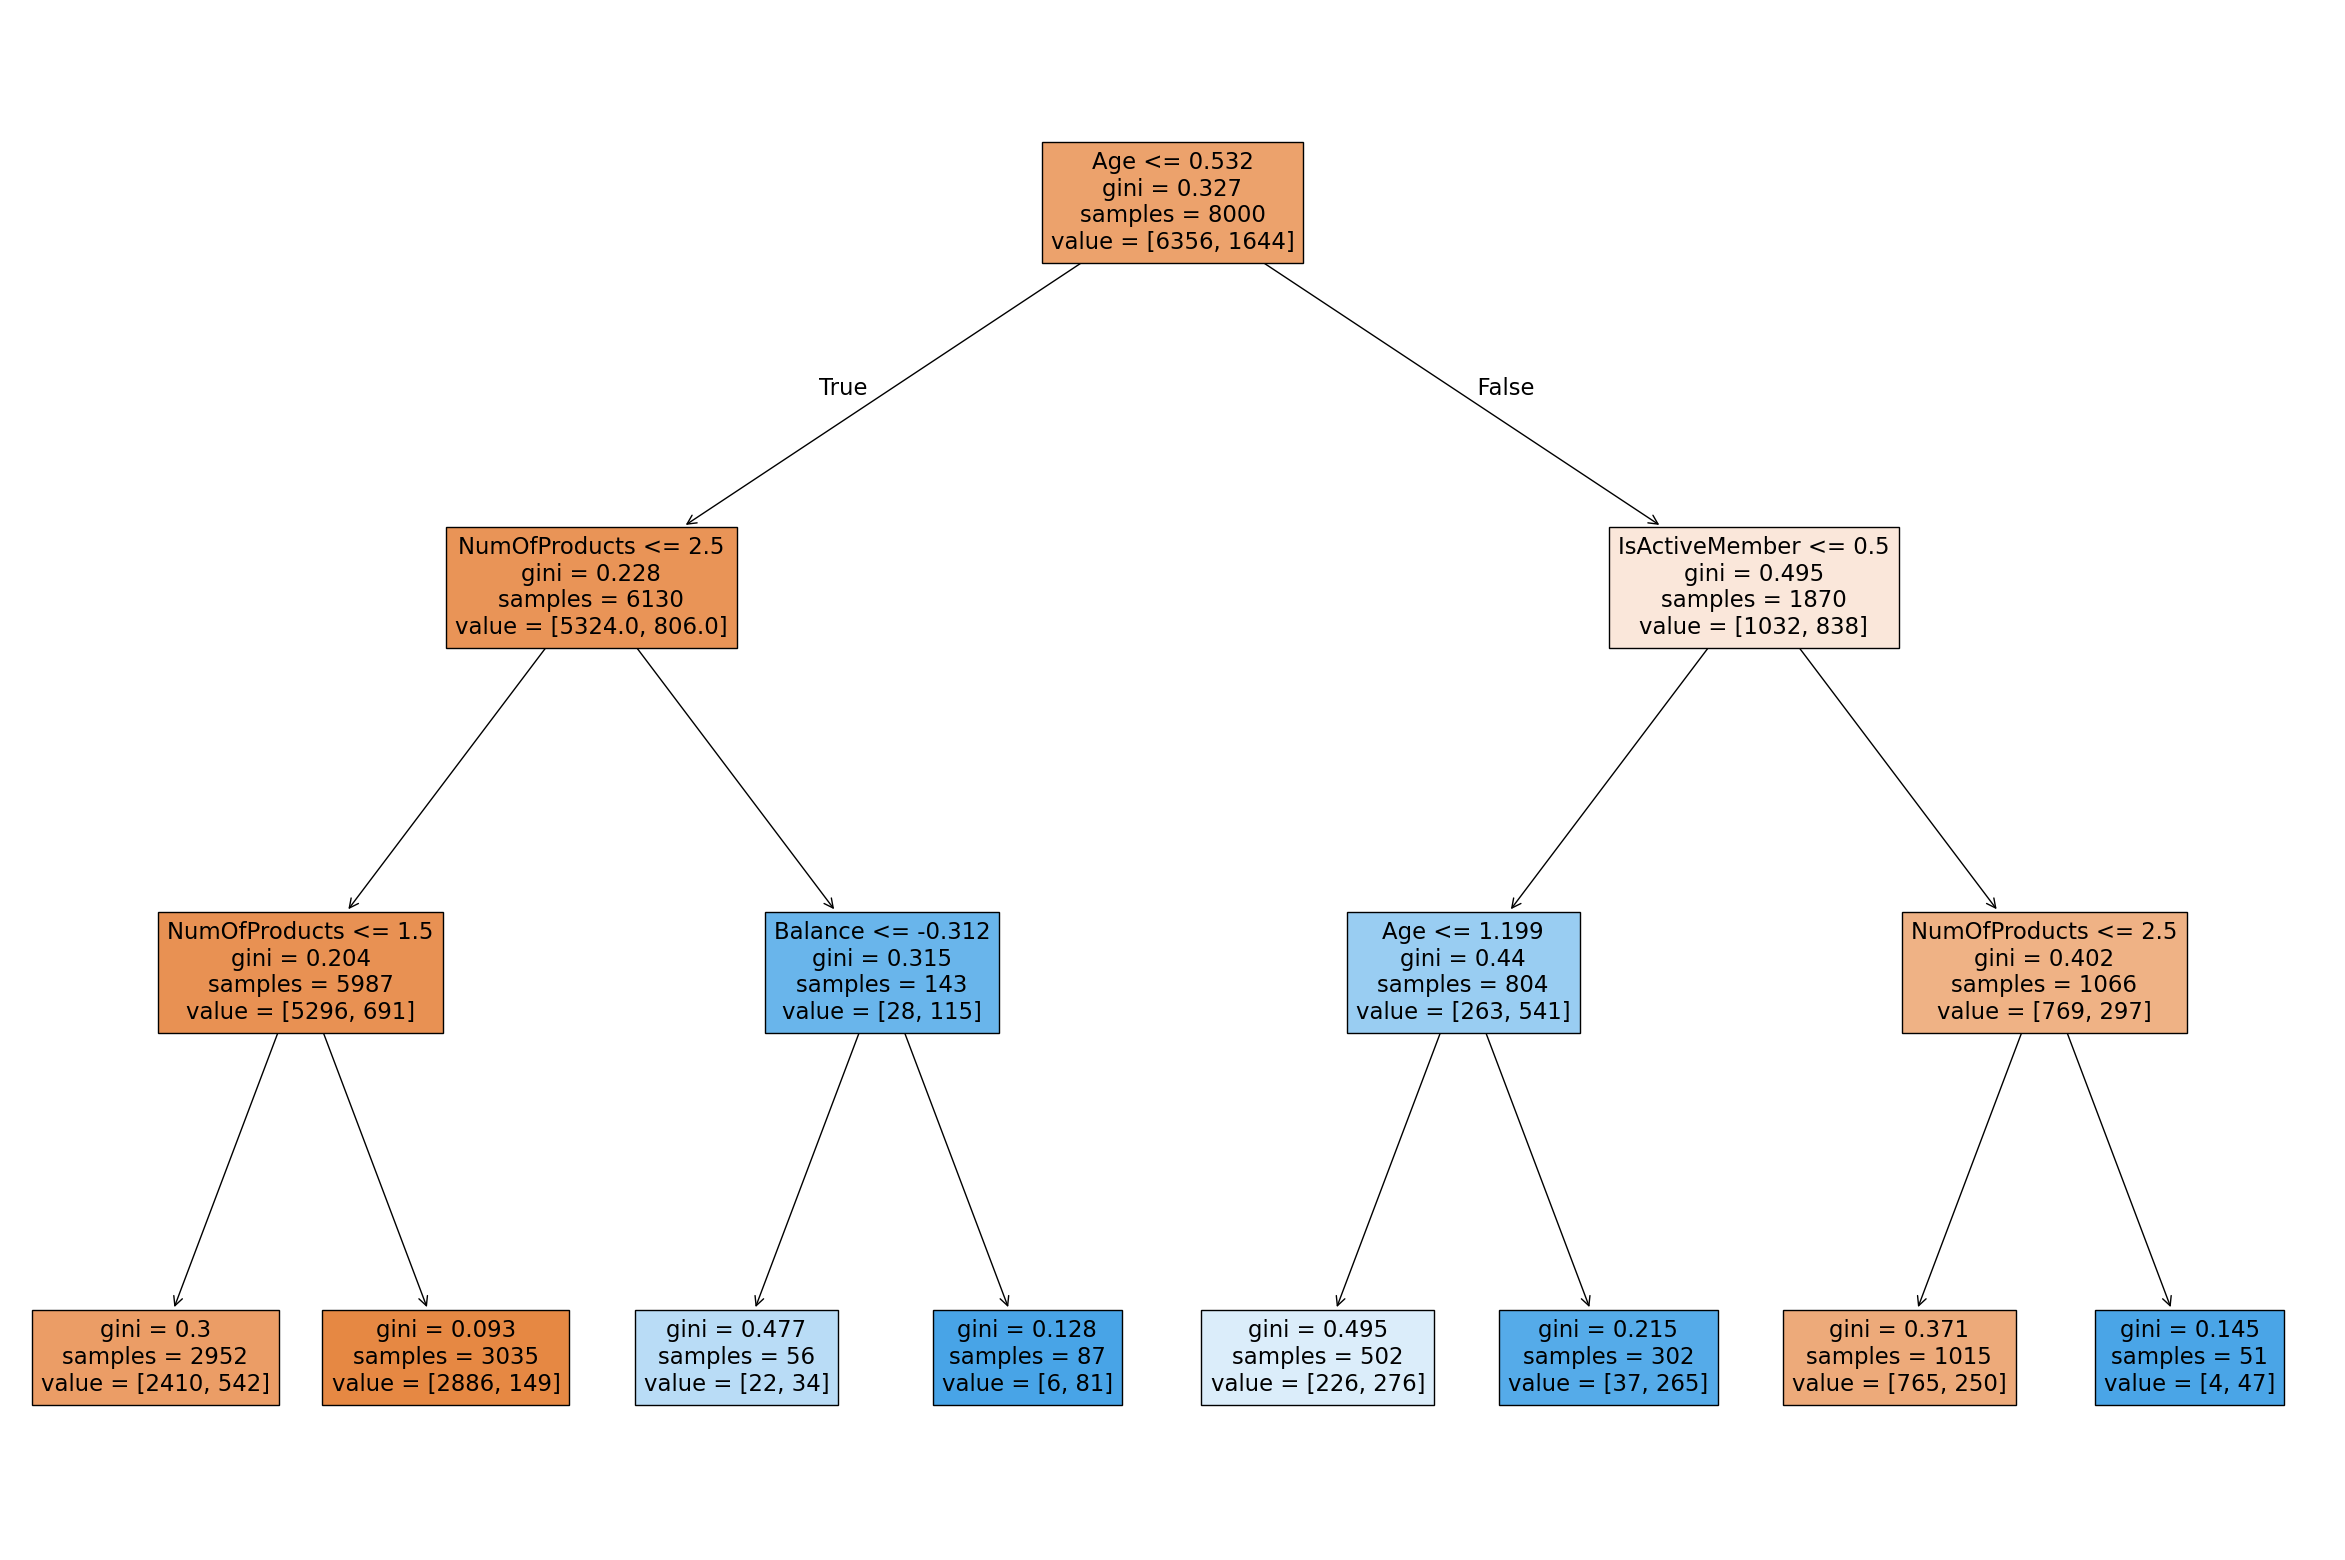

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(tree_model1, feature_names=X1.columns, filled=True)
plt.show()

### Random Forest

In [ ]:
RF_model1 = RandomForestClassifier()
RF_model1.fit(X_train1, y_train1)

RandomForestClassifier()

In [ ]:
y_predict1 = RF_model1.predict(X_test1)

#### Modelni baholash

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Modelning aniqligi: 0.8665


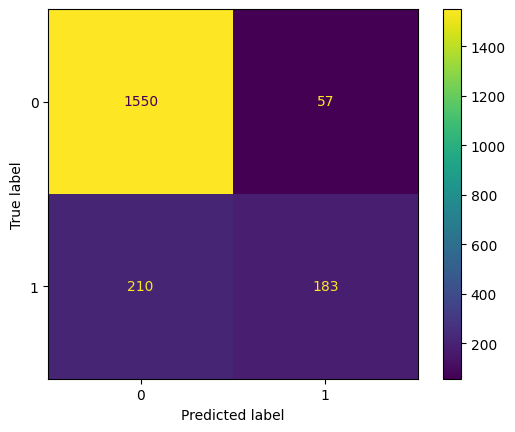

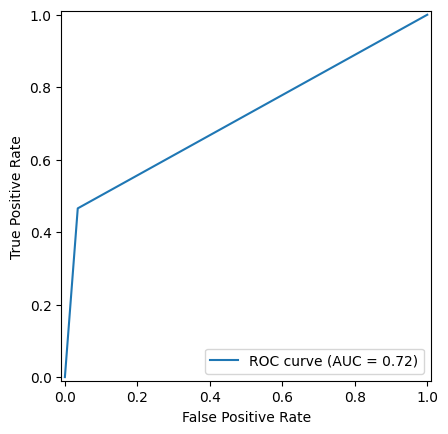

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test1, y_predict1))
print("Modelning aniqligi:", metrics.accuracy_score(y_test1, y_predict1))

metrics.ConfusionMatrixDisplay.from_predictions(y_test1, y_predict1)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_predict1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### SVM

In [ ]:
svm_clf1 = SVC()
svm_clf1.fit(X_train1, y_train1)

SVC()

In [ ]:
y_predict1 = svm_clf1.predict(X_test1)

#### Modelni baholash

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1607
           1       0.79      0.35      0.48       393

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000

Modelning aniqligi: 0.8535


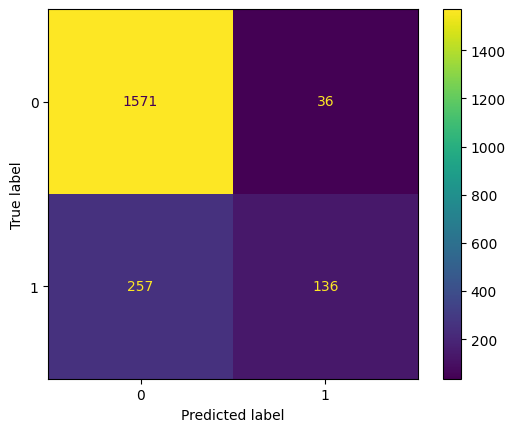

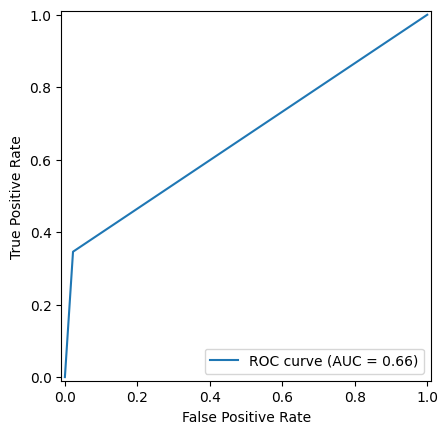

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test1, y_predict1))
print("Modelning aniqligi:", metrics.accuracy_score(y_test1, y_predict1))

metrics.ConfusionMatrixDisplay.from_predictions(y_test1, y_predict1)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_predict1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

### XGBoost


In [ ]:
xgdboost1 = XGBClassifier()
xgdboost1.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predict1 = xgdboost1.predict(X_test1)

#### Modelni baholash

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Modelning aniqligi: 0.861


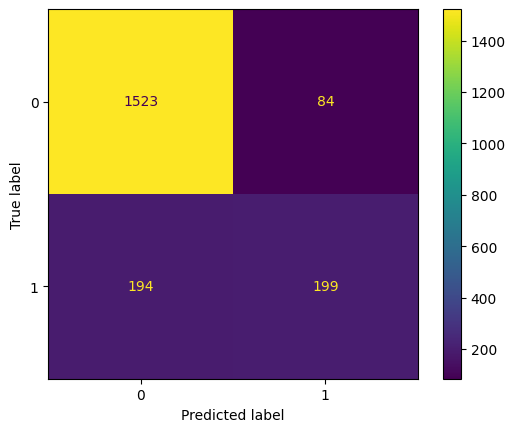

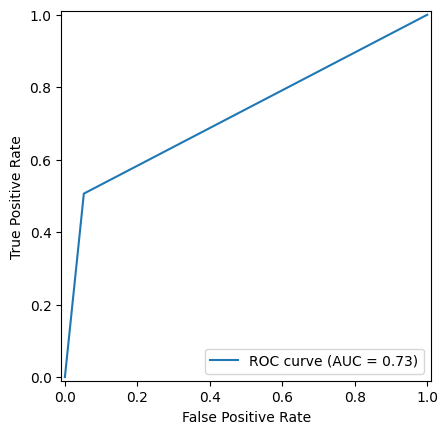

In [ ]:
print("Classification Report:\n\n", metrics.classification_report(y_test1, y_predict1))
print("Modelning aniqligi:", metrics.accuracy_score(y_test1, y_predict1))

metrics.ConfusionMatrixDisplay.from_predictions(y_test1, y_predict1)
plt.show()
print("\n")
# Roc Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_predict1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Yakuniy xulasa


Hozirda modellardan eng aniqligi baland chiqgani Random Forest1 modeli bo'ldi

In [130]:
# modelni saqlab olamiz
filename = "churn.jbl"
model = joblib.dump(RF_model1, filename)